## Planning Observations from AAVSO's list of program stars in need of observation

Download the csv list of stars and using [Astroplan](https://astroplan.readthedocs.io/en/latest/) to determine which are most suitable for observation.

First we download the csv file and create an array of FixedTargets

In [1]:
import os, subprocess, random
import numpy as np 
import pandas as pd
from astropy import units as u
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astroplan.plots import plot_sky
from astroplan import Observer, FixedTarget, observability_table
from astroplan import (AltitudeConstraint, AirmassConstraint,
                       AtNightConstraint)
from astroplan import is_observable, is_always_observable, months_observable
import matplotlib.pyplot as plt 
%matplotlib inline


targets = []
program_nmo = pd.read_csv('https://www.aavso.org/sites/default/files/legacy/program_nmo.csv')
for row in program_nmo.iterrows():
    coordinates = SkyCoord(row[1]['RA(J2000)'], row[1]['Dec(J2000)'], unit=(u.hourangle, u.deg))
    ft = FixedTarget(name=row[1]['Star name'], coord=coordinates)
    targets.append(ft)

Next we setup the observing location, time and some constraints relating to altitude and darkness.

In [18]:
location = Observer(longitude=-8.2*u.deg, latitude=52.2*u.deg, elevation=100*u.m, name="Obs")
time = Time('2017-03-06 23:00:00')
start_time = location.sun_set_time(time, which='nearest')
end_time = location.sun_rise_time(time, which='nearest')

constraints = [AltitudeConstraint(45*u.deg, 90*u.deg),
               AirmassConstraint(5), AtNightConstraint.twilight_astronomical()]
print start_time.iso
print end_time.iso


2017-03-06 18:16:01.983
2017-03-07 07:10:36.242


Now apply the constaints and generate an astropy table filtering only observable targets

In [19]:
time_range = Time([start_time, end_time])
# Are targets *ever* observable in the time range?
ever_observable = is_observable(constraints, location, targets, time_range=time_range)

# Are targets *always* observable in the time range?
always_observable = is_always_observable(constraints, location, targets, time_range=time_range)

table = observability_table(constraints, location, targets, time_range=time_range)
#add the targets and range details
table['tgt']=targets
table['range']=program_nmo['Range']
mask = table['ever observable'] == True

visible_targets = table[mask]
visible_targets

target name,ever observable,always observable,fraction of time observable,tgt,range
str13,bool,bool,float64,object,object
VZ Cas,True,False,0.0384615384615,"<FixedTarget ""VZ Cas"" at SkyCoord (ICRS): (ra, dec) in deg (19.11841667, 56.39527778)>",<9.300:15.000(V)>
S Cas,True,False,0.153846153846,"<FixedTarget ""S Cas"" at SkyCoord (ICRS): (ra, dec) in deg (19.924875, 72.61130556)>",<7.900:16.100(V)>
X Cas,True,False,0.0769230769231,"<FixedTarget ""X Cas"" at SkyCoord (ICRS): (ra, dec) in deg (29.15870833, 59.25933333)>",<9.450:13.200(V)>
RU Per,True,False,0.115384615385,"<FixedTarget ""RU Per"" at SkyCoord (ICRS): (ra, dec) in deg (52.62620833, 39.65808333)>",<10.000:12.000(V)>
U Cam,True,False,0.230769230769,"<FixedTarget ""U Cam"" at SkyCoord (ICRS): (ra, dec) in deg (55.45070833, 62.64841667)>",<11.000:12.800(p)>
ST Cam,True,False,0.384615384615,"<FixedTarget ""ST Cam"" at SkyCoord (ICRS): (ra, dec) in deg (72.805625, 68.16877778)>",<9.200:12.000(p)>
SV Aur,True,False,0.346153846154,"<FixedTarget ""SV Aur"" at SkyCoord (ICRS): (ra, dec) in deg (90.91741667, 46.43555556)>",<10.800:11.600(p)>
S Lyn,True,False,0.461538461538,"<FixedTarget ""S Lyn"" at SkyCoord (ICRS): (ra, dec) in deg (101.14208333, 57.91105556)>",<8.500:14.800(V)>
SW Gem,True,False,0.307692307692,"<FixedTarget ""SW Gem"" at SkyCoord (ICRS): (ra, dec) in deg (104.87583333, 26.04430556)>",<8.600:10.500(V)>


We can plot this table

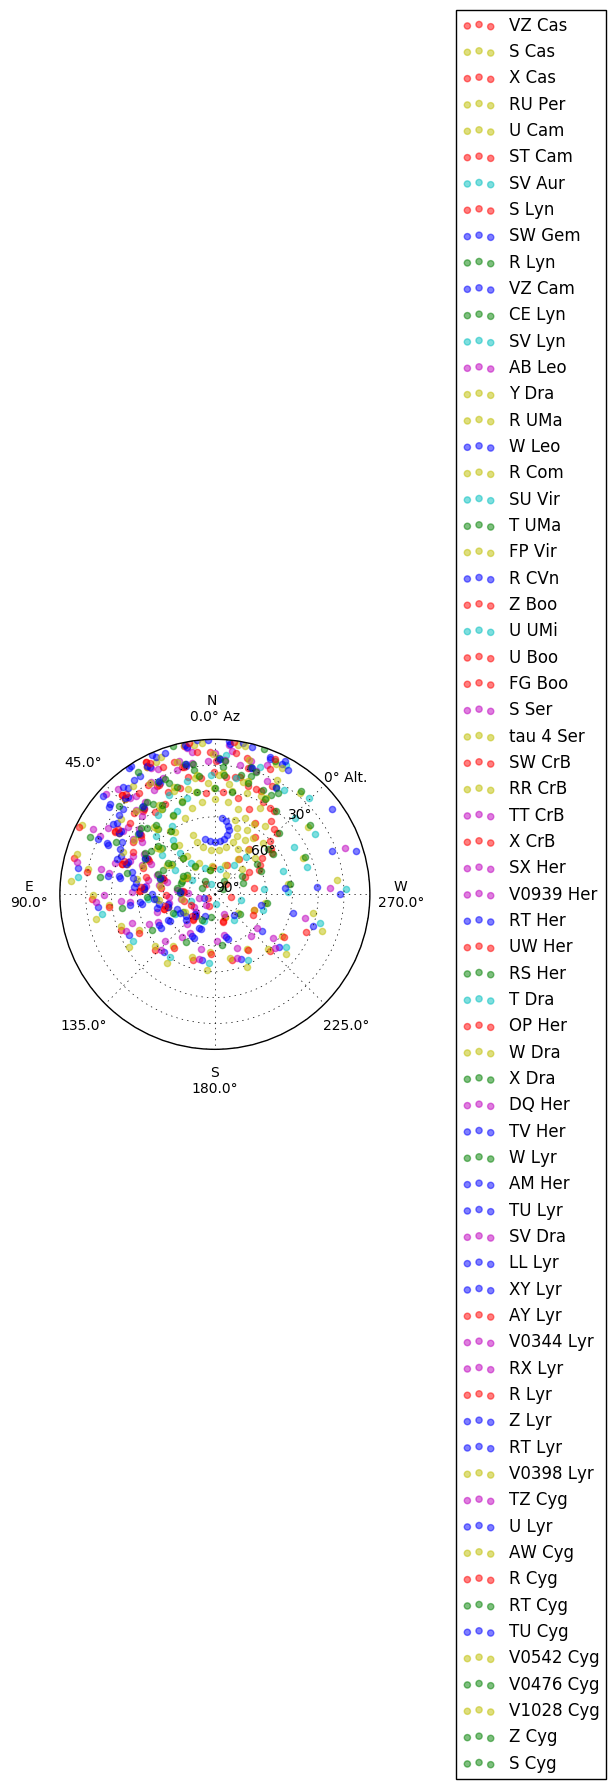

In [20]:
time_window = start_time + (end_time - start_time) * np.linspace(0, 1, 10)
colors = np.random.rand(50)

for visible_target in visible_targets:
    plot_sky(visible_target['tgt'], location, time_window, style_kwargs={'alpha': 0.5, 'color': random.choice(['r', 'g', 'b', 'c', 'm', 'y'])})  
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))  
plt.show()  